# Major Project:-Stock Prediction 
#by:Abhishek Joshi      cu.16bcs3171@gmail.com

# For Google

In [ ]:
#importing the necessary files for the data manupulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [73]:
# Fetching the data from the csv file of GOOGL
data=pd.read_csv('D:\\GOOGL.csv')

In [74]:
# displaying out the elements first five
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [75]:
# describing the elements for finding various satistical features
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


In [76]:
# checking any NAN or missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
Date         2335 non-null object
Open         2335 non-null float64
High         2335 non-null float64
Low          2335 non-null float64
Close        2335 non-null float64
Adj Close    2335 non-null float64
Volume       2335 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [77]:
# calculating the High-low percentage change as HL_cahnge
# calculating the OPen close percentage change as OP_change
data['HL_change']=(data['High']-data['Low'])/data['Low']*100
data['OP_change']=(data['Close']-data['Open'])/data['Open']*100

In [78]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_change,OP_change
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700,1.696426,-0.796656
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700,3.846154,3.166221
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500,1.741560,-0.019722
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200,1.732536,0.420872
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100,1.589967,1.242386


# Visualisation of data

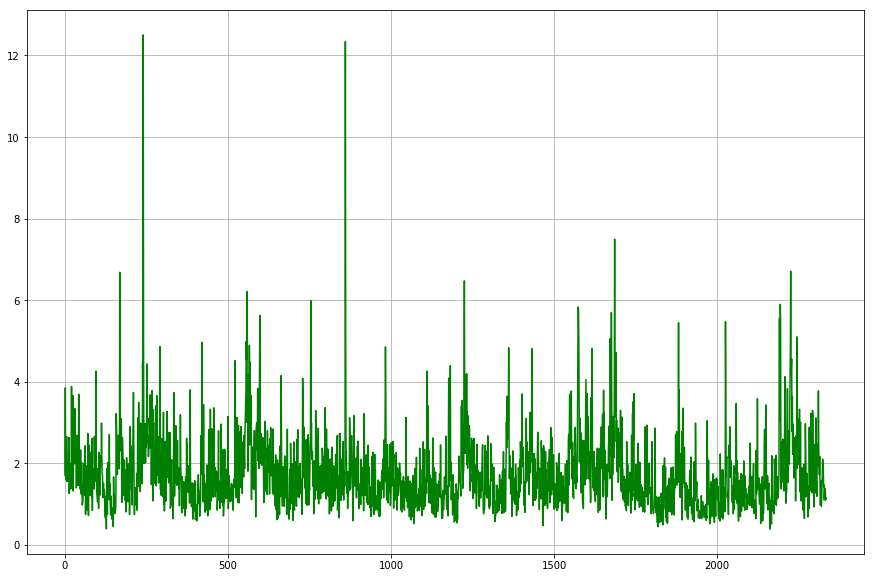

In [16]:
# visualising the High Low relationship on a line graph 
plt.figure(figsize=(15,10))
plt.plot(data['HL_change'],color='green')
plt.grid()
plt.show()
# max high low ==12-13

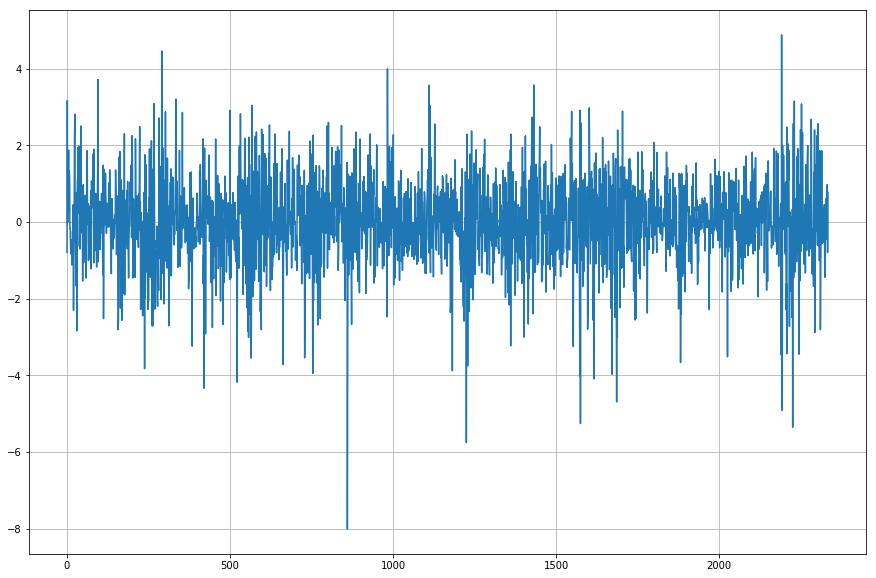

In [15]:
# visualising the Open close relationship on graph
plt.figure(figsize=(15,10))
plt.plot(data['OP_change'])
plt.grid()
plt.show()
# positive diff max== 5.2
# negative diff max== -8

In [30]:
df=pd.DataFrame({'high':data['High'],'low':data['Low']})

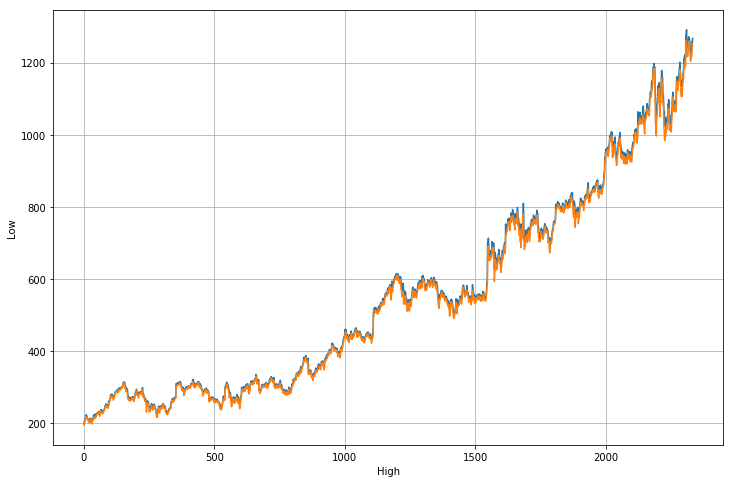

In [50]:
# plotiing the High and Low simultaneouly on graph 
plt.figure(figsize=(12,8))
plt.plot(df)
plt.grid()
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

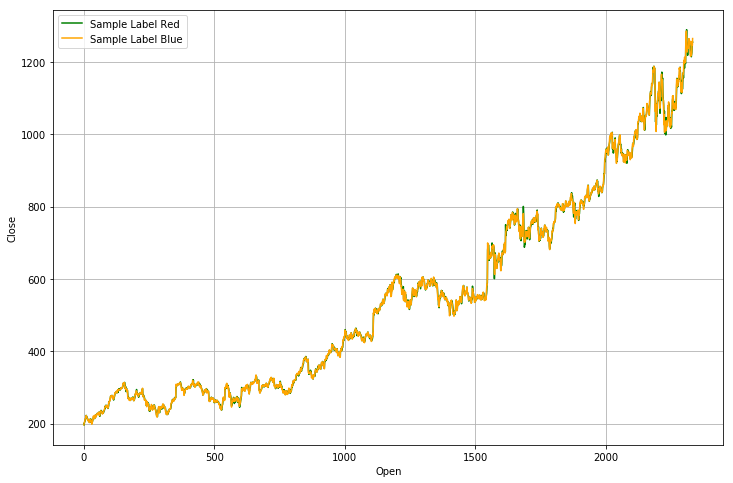

In [49]:
# plotiing the OPen and close simultaneouly on graph
plt.figure(figsize=(12,8))
plt.plot(data['Open'],'green',label='Sample Label Red')
plt.plot(data['Close'],'orange',label='Sample Label Blue')
plt.xlabel("Open")
plt.ylabel("Close")
plt.grid()
plt.legend()
plt.show()

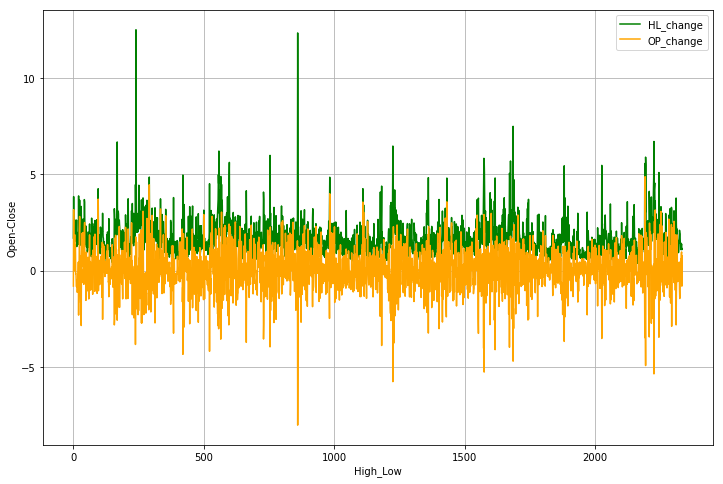

In [52]:
# visualising the pct_change btw high low and the open close
plt.figure(figsize=(12,8))
plt.plot(data['HL_change'],'green',label='HL_change')
plt.plot(data['OP_change'],'orange',label='OP_change')
plt.xlabel("High_Low")
plt.ylabel("Open-Close")
plt.grid()
plt.legend()
plt.show()

In [52]:
# finding the co-relation of the data to check suitable feature for 
correlation = data.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume,HL_change,OP_change
Open,1.000000,0.999879,0.999815,0.999687,0.999687,-0.573989,-0.067720,-0.001950
High,0.999879,1.000000,0.999805,0.999844,0.999844,-0.572042,-0.061926,0.007988
Low,0.999815,0.999805,1.000000,0.999874,0.999874,-0.577802,-0.079350,0.011078
Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422,-0.071887,0.020148
Adj Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422,-0.071887,0.020148
Volume,-0.573989,-0.572042,-0.577802,-0.575422,-0.575422,1.000000,0.442151,-0.089211
HL_change,-0.067720,-0.061926,-0.079350,-0.071887,-0.071887,0.442151,1.000000,-0.167198
OP_change,-0.001950,0.007988,0.011078,0.020148,0.020148,-0.089211,-0.167198,1.000000


# Preprocesssing of Data

In [9]:
# describing the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume,HL_change,OP_change
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03,2335.000000,2335.000000
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06,1.727162,-0.010262
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06,0.916346,1.131527
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05,0.382147,-8.012818
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06,1.134269,-0.606670
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06,1.521306,0.003876
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06,2.087705,0.653675
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07,12.504347,4.879212


In [79]:
# comparing the CLose and ADJ close to set the Label to predict Price
data['Dif']=data['Close']-data['Adj Close']
data['Dif'].unique()

array([0.])

In [80]:
# As close and adj.close are partiuclarly same so taking adj.close as a Label
del data['Dif']

In [178]:
# Shifting the col by looking at the last 20% value i.e [0.01*len(data)] as label and new 20 values as label1
# Setting label as a Adj_Close
f_col='Adj Close'
f_out=int(math.ceil(0.02*len(data)))
data['Label']=data[f_col].shift(-f_out)
data['Label1']=data[f_col].shift(20)
data.dropna(inplace=True)

In [179]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_change,OP_change,Label,Label1
60,2009-08-18,222.772766,224.074081,221.381378,222.862869,222.862869,4697400,1.216319,0.040446,265.220215,214.164169
61,2009-08-19,220.215210,222.722717,219.499496,222.207214,222.207214,4505400,1.468441,0.904571,275.200195,214.059052
62,2009-08-20,226.226227,231.321320,225.840836,230.435440,230.435440,7989800,2.426702,1.860621,276.321320,218.888885
63,2009-08-21,233.003006,233.278275,231.556549,232.852859,232.852859,7113800,0.743545,-0.064440,276.136139,223.583588
64,2009-08-24,233.908905,235.280273,232.442444,234.599594,234.599594,4901800,1.220874,0.295281,275.825836,222.622620


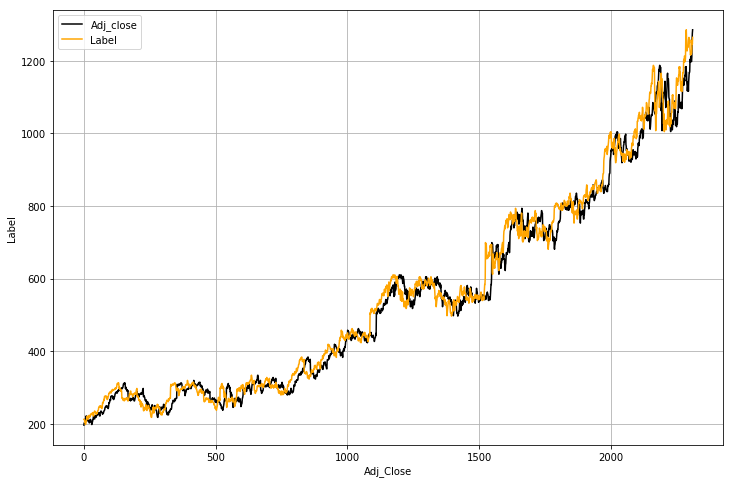

In [65]:
# comparing the adj_close and the label to check pattern
plt.figure(figsize=(12,8))
plt.plot(data['Adj Close'],'black',label='Adj_close')
plt.plot(data['Label'],'orange',label='Label')
plt.xlabel("Adj_Close")
plt.ylabel("Label")
plt.grid()
plt.legend()
plt.show()

# Modelling of the Dataset

In [180]:
# importing the libraries for modelling
from sklearn import preprocessing ,cross_validation
from sklearn.linear_model import LinearRegression

In [182]:
# Splitiing the data for training and testing
x=data.copy()
del x['Label']
del x['Date']
del x['Adj Close']
del x['Volume']
y=data['Label'].copy()
x=preprocessing.scale(x)

In [183]:
from sklearn.model_selection import train_test_split

In [188]:
# dividing the data into test and train as 70 :30
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=0.3)

In [189]:
# checking the shape of each to check correctness
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1389, 7) (596, 7) (1389,) (596,)


In [190]:
# building up a regression model and training the data
result=LinearRegression()
result.fit(x_train,y_train)
accuracy=result.score(x_test,y_test)

In [191]:
# printing the accuracy
print(accuracy)

0.9649045012698263


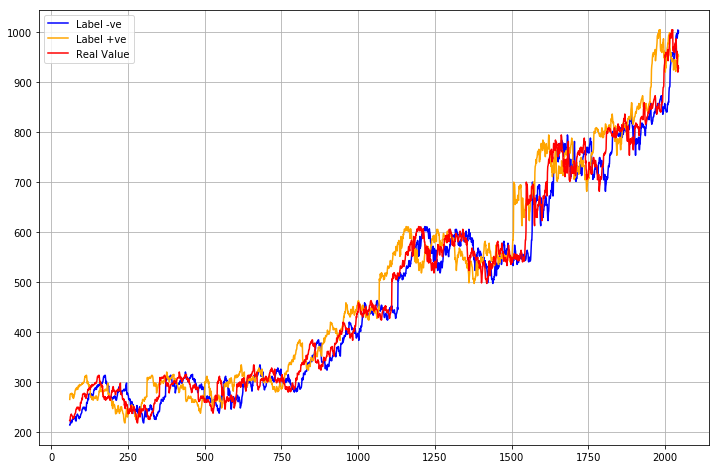

In [192]:
# plotting the upper bound and lower bound along with real values of dj close feature
plt.figure(figsize=(12,8))
plt.plot(data['Label1'],'blue',label='Label -ve')
plt.plot(data['Label'],'orange',label='Label +ve')
plt.plot(data['Adj Close'],'red',label='Real Value')
plt.grid()
plt.legend()
plt.show()

In [197]:
# defining the prediction features 
X = x[-f_out:]

array([[ 2.31008542e+00,  2.28233283e+00,  2.31489170e+00,
         2.28924739e+00, -9.84511359e-01, -4.09102973e-01,
         1.80271309e+00],
       [ 2.28530509e+00,  2.25587009e+00,  2.29260724e+00,
         2.28017587e+00, -1.08756046e+00, -1.07754403e-01,
         1.79370723e+00],
       [ 2.26139790e+00,  2.26203977e+00,  2.28659609e+00,
         2.28526946e+00, -7.96421039e-01,  4.54909768e-01,
         1.80152556e+00],
       [ 2.29320953e+00,  2.26199152e+00,  2.30345612e+00,
         2.28163114e+00, -1.19881576e+00, -2.31968332e-01,
         1.79519165e+00],
       [ 2.28079524e+00,  2.28474291e+00,  2.30717024e+00,
         2.30142339e+00, -7.43675886e-01,  3.90239179e-01,
         1.86916817e+00],
       [ 2.32085080e+00,  2.30016754e+00,  2.34396880e+00,
         2.32757086e+00, -1.24693579e+00,  1.20155516e-01,
         1.86352708e+00],
       [ 2.30218097e+00,  2.27650030e+00,  2.24481276e+00,
         2.21871228e+00,  5.60547956e-01, -1.61534570e+00,
         1.8759967

In [206]:
# predicting the result of Close
forecast=result.predict(X)

In [202]:
print('Close for next 40 days',forecast)

Close for next 47 days [ 957.19733627  955.94873357  959.29080663  956.10995723  964.93732996
  968.03313064  944.13050714  959.95878401  962.01850128  975.02813855
  980.10069966  986.36468186 1001.53101792 1006.4250771  1011.69747696
 1000.50184331 1005.92330605 1017.27918449 1022.19081413 1014.63938465
 1020.60009842 1020.94915002  979.03716831  985.26402297  994.40686231
  991.2355542   985.65391027  983.2634633  1000.30250232  993.95370174
 1006.85787089 1004.66004487 1018.26518091  998.37118131  981.59977659
  994.56423958  969.88223595  966.4135858   959.32900148  974.90197744
  971.38441624]


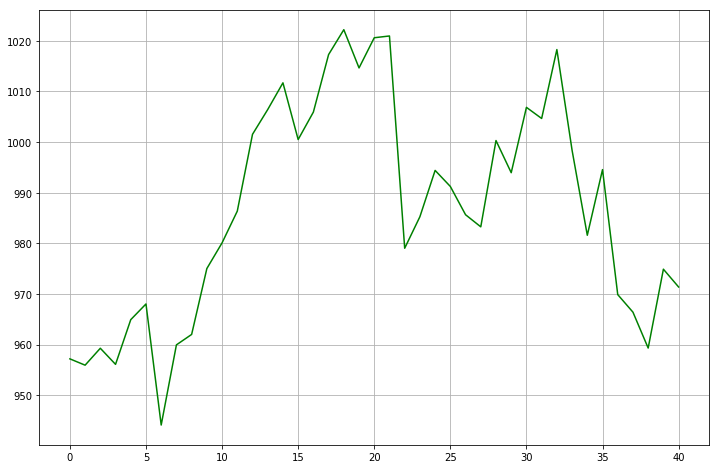

In [204]:
plt.figure(figsize=(12,8))
plt.plot(forecast,'green',label='Prediction')
plt.grid()
plt.show()

# For AMD

In [5]:
#importing the necessary files for the data manupulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
# reading csv and converting it into dataframe as data1
data1=pd.read_csv('D:\\AMD.csv')
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300
1,2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300
2,2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600
3,2009-05-28,4.75,4.84,4.54,4.70,4.70,18383900
4,2009-05-29,4.71,4.78,4.38,4.54,4.54,24539700


In [4]:
# describing the data
data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,6.434732,6.563961,6.300887,6.433221,6.433221,3.107491e+07
std,3.872391,3.954999,3.792914,3.879124,3.879124,2.791149e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.480000,3.550000,3.405000,3.465000,3.465000,1.421670e+07
50%,5.580000,5.720000,5.450000,5.600000,5.600000,2.228020e+07
75%,8.555000,8.710000,8.375000,8.565000,8.565000,3.776905e+07
max,25.510000,27.299999,24.629999,25.260000,25.260000,3.250584e+08


In [6]:
# Analysing the data for NAN values and missing values using info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
Date         2335 non-null object
Open         2335 non-null float64
High         2335 non-null float64
Low          2335 non-null float64
Close        2335 non-null float64
Adj Close    2335 non-null float64
Volume       2335 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [7]:
# calculating the High-low percentage change as HL_cahnge
# calculating the OPen close percentage change as OP_change
data1['HL_change']=(data1['High']-data1['Low'])/data1['Low']*100
data1['OP_change']=(data1['Close']-data1['Open'])/data1['Open']*100

In [8]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_change,OP_change
0,2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300,4.235294,-3.837472
1,2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300,8.037825,6.338028
2,2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600,5.494505,3.063457
3,2009-05-28,4.75,4.84,4.54,4.70,4.70,18383900,6.607930,-1.052632
4,2009-05-29,4.71,4.78,4.38,4.54,4.54,24539700,9.132420,-3.609342


# Visualising the data

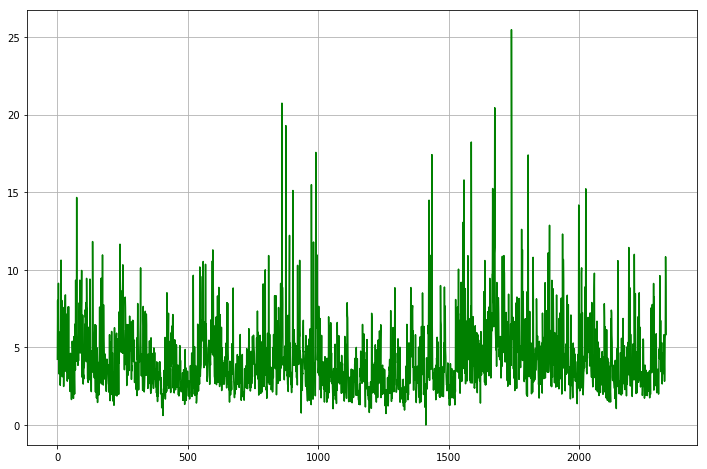

In [9]:
# visualising the High Low relationship on a line graph 
plt.figure(figsize=(12,8))
plt.plot(data1['HL_change'],color='green')
plt.grid()
plt.show()
# max high-low == 21.2
# min HIgh-Low== 0

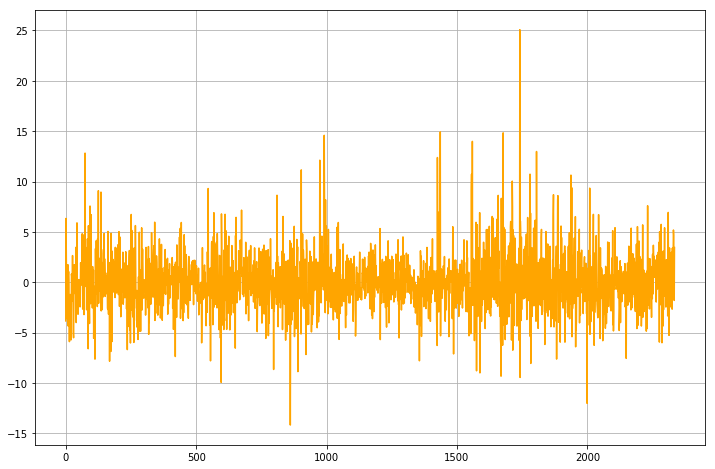

In [11]:
# visualising the Open CLose relationship on a line graph 
plt.figure(figsize=(12,8))
plt.plot(data1['OP_change'],color='orange',label="Open_Close")
plt.grid()
plt.show()
# max Open-close == 25.2
# min open-close== 14.3

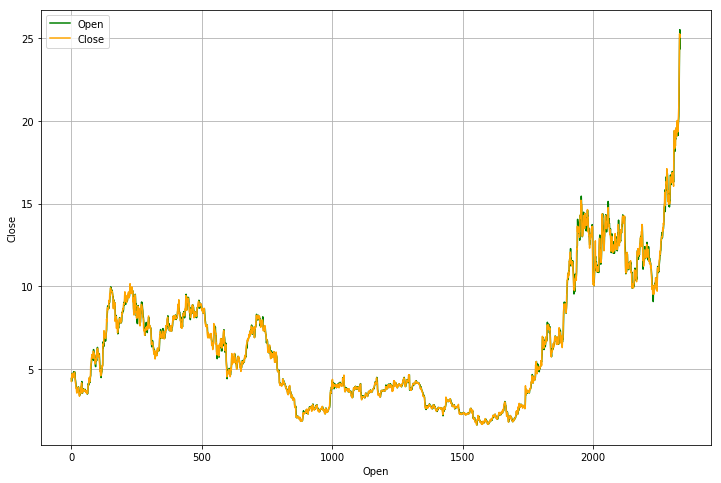

In [12]:
# plotiing the Open and close simultaneouly on graph
plt.figure(figsize=(12,8))
plt.plot(data1['Open'],'green',label='Open')
plt.plot(data1['Close'],'orange',label='Close')
plt.xlabel("Open")
plt.ylabel("Close")
plt.grid()
plt.legend()
plt.show()

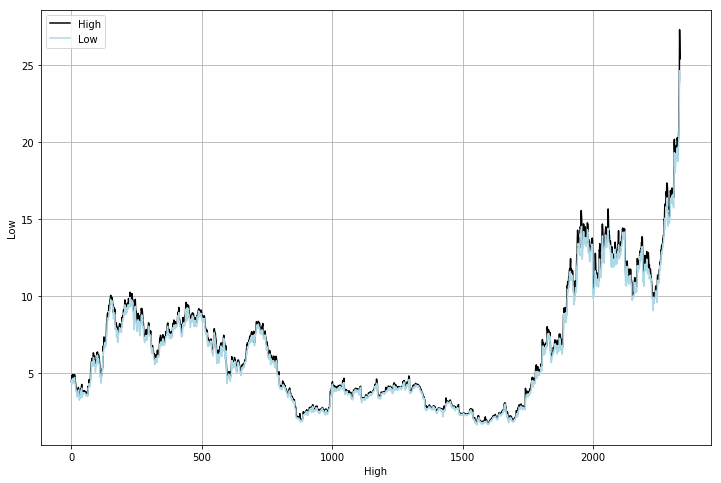

In [17]:
# plotiing the High-Low simultaneouly on graph
plt.figure(figsize=(12,8))
plt.plot(data1['High'],'black',label='High')
plt.plot(data1['Low'],'lightblue',label='Low')
plt.xlabel("High")
plt.ylabel("Low")
plt.grid()
plt.legend()
plt.show()

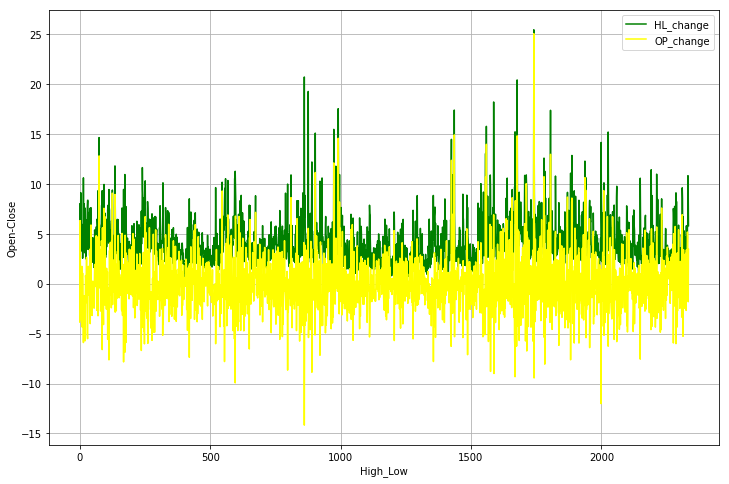

In [18]:
# visualising the pct_change btw high low and the open close
plt.figure(figsize=(12,8))
plt.plot(data1['HL_change'],'green',label='HL_change')
plt.plot(data1['OP_change'],'yellow',label='OP_change')
plt.xlabel("High_Low")
plt.ylabel("Open-Close")
plt.grid()
plt.legend()
plt.show()

In [19]:
# finding the co-relation of the data to check suitable feature for 
correlation = data1.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume,HL_change,OP_change
Open,1.000000,0.999364,0.999352,0.998658,0.998658,0.579491,-0.048198,-0.002665
High,0.999364,1.000000,0.999261,0.999427,0.999427,0.590739,-0.032111,0.021000
Low,0.999352,0.999261,1.000000,0.999423,0.999423,0.569752,-0.063460,0.019221
Close,0.998658,0.999427,0.999423,1.000000,1.000000,0.579457,-0.046593,0.040522
Adj Close,0.998658,0.999427,0.999423,1.000000,1.000000,0.579457,-0.046593,0.040522
Volume,0.579491,0.590739,0.569752,0.579457,0.579457,1.000000,0.431368,0.037211
HL_change,-0.048198,-0.032111,-0.063460,-0.046593,-0.046593,0.431368,1.000000,0.115174
OP_change,-0.002665,0.021000,0.019221,0.040522,0.040522,0.037211,0.115174,1.000000


# Preprocessing Of Data

In [20]:
# comparing the CLose and ADJ close to set the Label to predict Price
data1['Dif']=data1['Close']-data1['Adj Close']
data1['Dif'].unique()

array([0.])

In [21]:
# As Adj_close and close are equal so any one of them can be treated as label
del data1['Dif']

In [8]:
# Shifting the col by looking at the last 20% value i.e [0.01*len(data)] as label and new 10 values as label1
# Setting label as a Adj_Close
f1_col='Adj Close'
f1_out=int(math.ceil(0.01*len(data1)))
data1['Label']=data1[f1_col].shift(-f1_out)
data1['Label1']=data1[f1_col].shift(10)
data1.dropna(inplace=True)

In [28]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_change,OP_change,Label,Label1
60,2009-08-18,3.55,3.58,3.49,3.56,3.56,23269700,2.578797,0.281690,5.81,3.76
61,2009-08-19,3.49,3.53,3.47,3.52,3.52,10937500,1.729107,0.859599,6.08,3.75
62,2009-08-20,3.53,3.55,3.49,3.52,3.52,6528900,1.719198,-0.283286,6.02,3.71
63,2009-08-21,3.53,3.71,3.51,3.70,3.70,20133600,5.698006,4.815864,5.66,3.70
64,2009-08-24,3.93,4.10,3.88,4.00,4.00,49755000,5.670103,1.781170,5.83,3.68


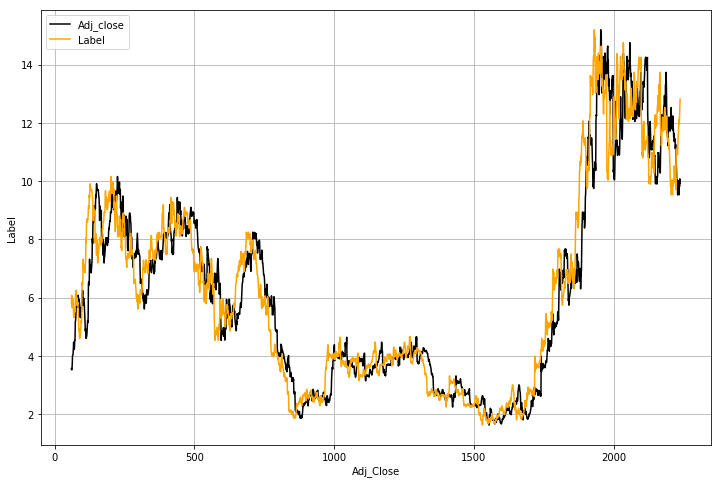

In [29]:
# comparing the adj_close and the label to check pattern
plt.figure(figsize=(12,8))
plt.plot(data1['Adj Close'],'black',label='Adj_close')
plt.plot(data1['Label'],'orange',label='Label')
plt.xlabel("Adj_Close")
plt.ylabel("Label")
plt.grid()
plt.legend()
plt.show()

# Modelling of Dataset

In [2]:
# importing the libraries for modelling
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
from sklearn.model_selection import train_test_split

In [9]:
# Splitiing the data for training and testing
x1=data1.copy()
del x1['Label']
del x1['Date']
del x1['Adj Close']
del x1['Volume']
y1=data1['Label'].copy()

In [10]:
# dividing the data into test and train as 70 :30
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3)

In [11]:
# checking the shape of each to check correctness
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

(1610, 7) (691, 7) (1610,) (691,)


In [16]:
# building up a regression model and training the data
result1=LinearRegression()
result1.fit(x1_train,y1_train)
accuracy=result1.score(x1_test,y1_test)

In [17]:
accuracy

0.892676528978158

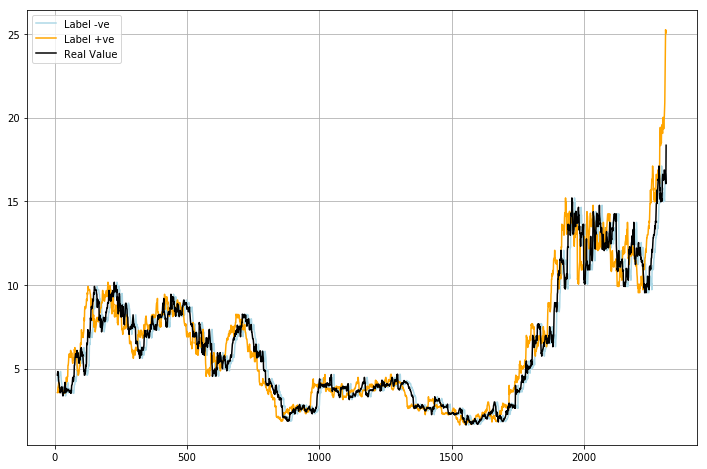

In [19]:
# plotting the upper bound and lower bound along with real values of dj close feature
plt.figure(figsize=(12,8))
plt.plot(data1['Label1'],'lightblue',label='Label -ve')
plt.plot(data1['Label'],'orange',label='Label +ve')
plt.plot(data1['Adj Close'],'black',label='Real Value')
plt.grid()
plt.legend()
plt.show()

In [20]:
# defining the prediction features 
X1 = x1[-f1_out:]

In [23]:
# predicting the result of Close
forecast1=result1.predict(X1)

In [24]:
print('The Close Predicted values are ',forecast1)

The Close Predicted values are  [15.86888655 16.06340319 15.6272091  15.40188938 15.44423246 15.11559358
 15.07541152 14.94145833 15.52712531 16.80655506 17.04640987 16.68112383
 16.42815132 16.65915976 16.52320283 16.80274852 16.97024304 17.12103974
 16.76415994 16.57603987 17.1383821  16.61790168 16.42393173 19.4835623 ]


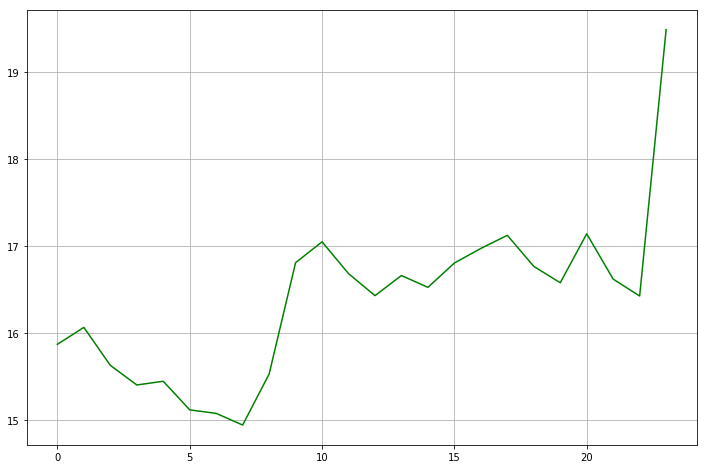

In [27]:
# plotiing the forecasted result
plt.figure(figsize=(12,8))
plt.plot(forecast1,'green',label='Prediction')
plt.grid()
plt.show()

# Thankyou